# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [12]:
#create file path and load data
path = r'/Users/brooks/Downloads/6/6.1/World Happiness Data/02 Data/Prepared Data'


In [20]:
df_hap = pd.read_csv(os.path.join(path,'Happiness_data_final.csv'), index_col = False)

In [48]:
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Lower Confidence Interval,Upper Confidence Interval,Standard error of Happiness score
0,152,Afghanistan,Southern Asia,153,3.575,0.030840,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015,3.288000,3.432000,0.031311
1,469,Afghanistan,Southern Asia,154,3.360,0.032983,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016,3.288000,3.432000,0.031311
2,608,Afghanistan,Southern Asia,141,3.794,0.035127,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017,3.714338,3.873661,0.031311
3,761,Afghanistan,Southern Asia,145,3.632,0.037270,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018,3.311402,3.458531,0.031311
4,919,Afghanistan,Southern Asia,154,3.203,0.039413,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019,2.908466,3.043401,0.031311


In [60]:
# create subset by dropping the column Unnamed:0 and the columns Lower & Upper Confidence Interval since they are not relevant for the relationship analysis.
df_hap = df.drop(columns = ['Unnamed: 0', 'Lower Confidence Interval', 'Upper Confidence Interval'])

In [62]:
df_hap.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year', 'Standard error of Happiness score'],
      dtype='object')

In [63]:
df_hap=df_hap

In [64]:
df_hap

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score
0,Afghanistan,Southern Asia,153,3.5750,0.030840,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015,0.031311
1,Afghanistan,Southern Asia,154,3.3600,0.032983,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016,0.031311
2,Afghanistan,Southern Asia,141,3.7940,0.035127,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017,0.031311
3,Afghanistan,Southern Asia,145,3.6320,0.037270,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018,0.031311
4,Afghanistan,Southern Asia,154,3.2030,0.039413,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019,0.031311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Zimbabwe,Sub-Saharan Africa,146,3.6630,0.042900,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,2019,0.063721
1466,Zimbabwe,Sub-Saharan Africa,151,3.2992,0.042900,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064,2020,0.058674
1467,Zimbabwe,Sub-Saharan Africa,148,3.1450,0.042900,7.943000,0.750000,56.201000,0.677000,0.821000,-0.047000,2021,0.058000
1468,Zimbabwe,Sub-Saharan Africa,144,2.9950,0.042900,7.792000,0.720000,55.125500,0.665500,0.793500,-0.046500,2022,0.059500


# clean data - look for outliers extreme values

In [66]:
df_hap.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Standard error of Happiness score
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,76.325850,5.448368,0.047080,4.089385,0.969487,24.671361,0.555297,0.352562,0.138323,2018.418367,0.058835
std,44.343336,1.122521,0.014077,4.191500,0.292215,31.376082,0.229495,0.321203,0.171428,2.684411,0.018970
min,1.000000,1.859000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,2015.000000,0.025902
25%,38.000000,4.603500,0.038560,0.838585,0.793857,0.604693,0.392778,0.078000,0.032000,2016.000000,0.045728
50%,76.000000,5.458500,0.044401,1.286006,0.922906,0.832381,0.546040,0.179180,0.145505,2018.000000,0.055655
75%,114.000000,6.269000,0.050921,8.983500,1.185898,63.374625,0.750750,0.721000,0.243250,2021.000000,0.066772
max,158.000000,7.842000,0.136930,11.660000,1.644000,76.953000,0.974998,0.939000,0.838075,2023.000000,0.173000


/var/folders/_0/1vzyz01d69s9hqf6yl5yyyk40000gn/T/ipykernel_79150/3865044934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hap['Happiness Score'], bins=60) # Shows extreme values


<Axes: xlabel='Happiness Score', ylabel='Density'>

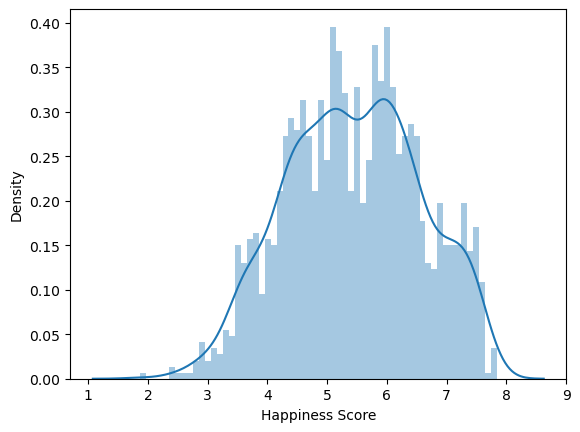

In [68]:
sns.distplot(df_hap['Happiness Score'], bins=60) # Shows extreme values



In [70]:
# Define data types for specific columns
data_types = {
    'Happiness Score': 'datetime64'
}

In [74]:
df_hap = pd.read_csv(os.path.join(path,'Happiness_data_final.csv'), index_col = False)

In [77]:
#create a sample from larger data set 
sample = df_hap.sample(n=500)
sample.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Lower Confidence Interval,Upper Confidence Interval,Standard error of Happiness score
1382,20,United Kingdom,Western Europe,21,6.8670,0.018660,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,2015,6.539667,6.705000,0.042166
38,650,Argentina,Latin America and Caribbean,29,6.3880,0.046623,1.073000,1.468000,0.744000,0.570000,0.054000,0.062000,2018,6.295261,6.486539,0.054868
962,815,Nicaragua,Latin America and Caribbean,45,6.1050,0.045848,0.694000,1.325000,0.835000,0.435000,0.127000,0.200000,2019,5.993060,6.237074,0.060189
1236,448,Sudan,Sub-Saharan Africa,133,4.1390,0.075078,0.630690,0.819280,0.297590,0.000000,0.100390,0.180770,2016,3.928000,4.350000,0.080113
595,936,Ireland,Western Europe,16,7.0937,0.035616,11.160978,0.942082,72.300789,0.886983,0.357184,0.145785,2020,7.015568,7.171832,0.039863


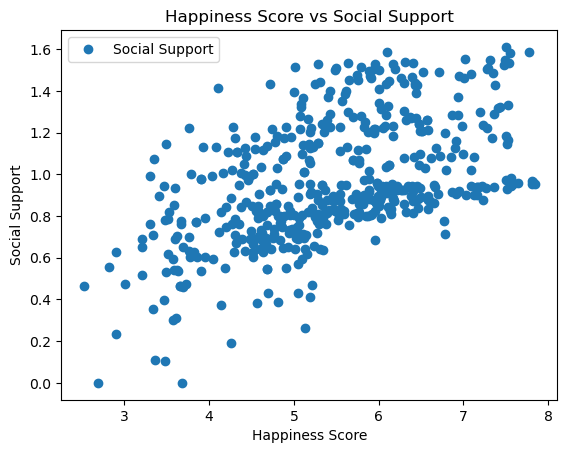

In [113]:
# Create a scatterplot comparing checkout time and trip time
# used sample because using entire dataset covered the whole field in dots

sample.plot(x = 'Happiness Score', y= 'Social Support' ,style='o') 
plt.title('Happiness Score vs Social Support')  
plt.xlabel('Happiness Score')  
plt.ylabel('Social Support')  
plt.show()

# 3. Prepare variables for regression

In [114]:
#reshape variables for regression 
X = sample['Happiness Score'].values.reshape(-1, 1)
y = sample['Social Support'].values.reshape(-1, 1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [116]:
#create linear regression object
regression = LinearRegression()

In [117]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [118]:
y_predicted = regression.predict(X_test)

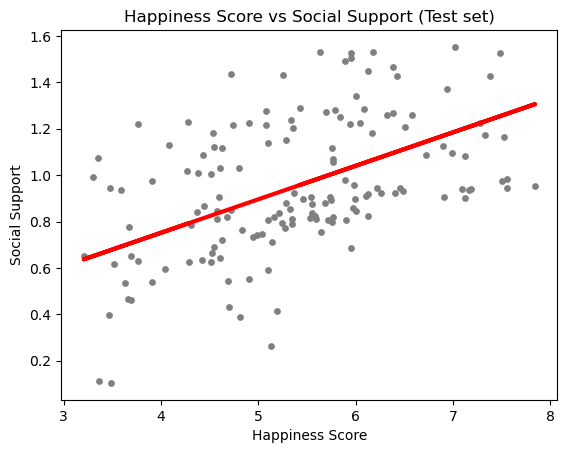

In [120]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Social Support (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Social Support')
plot_test.show()

In [96]:
#Hypothesis: The happiness score is higher as there is social support
#There is a correlation between the two variables

In [121]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [122]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.14428057]]
Mean squared error:  0.06566662215468054
R2 score:  0.22415177893767313


In [102]:
#as Social support is available, Happiness Score increases by 0.1
#the MSE is quite large and R2 is quite small indicating a Good fit

In [123]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.290000,0.958073
1,0.983000,1.264958
2,1.007484,0.806001
3,0.811980,0.981014
4,1.340430,1.040746
5,1.493000,1.024442
6,0.936683,1.208328
7,0.653000,0.707602
8,0.666000,0.826633
9,0.924500,0.949561


# predicted values are close to each other of actual values in many cases. This model is good at predicting happiness scores becasue there is a correlation between Happiness Score and Social Support.

# 5. Export dataset

In [124]:
#check shape before export
df_hap.shape

(1470, 16)